In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from kneed import KneeLocator

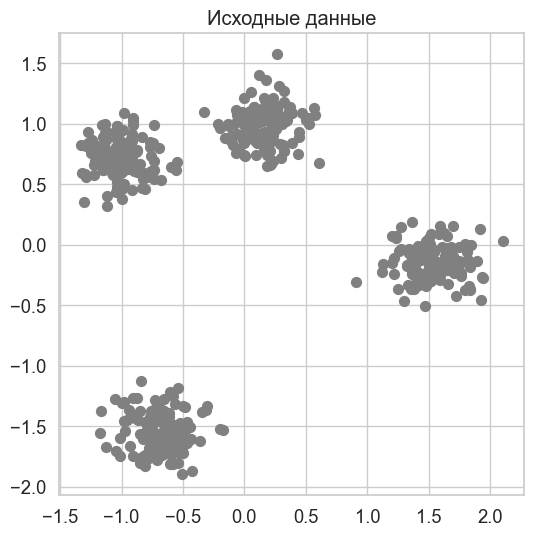

In [71]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', s=50)
plt.title("Исходные данные")
plt.show()

метод k средних

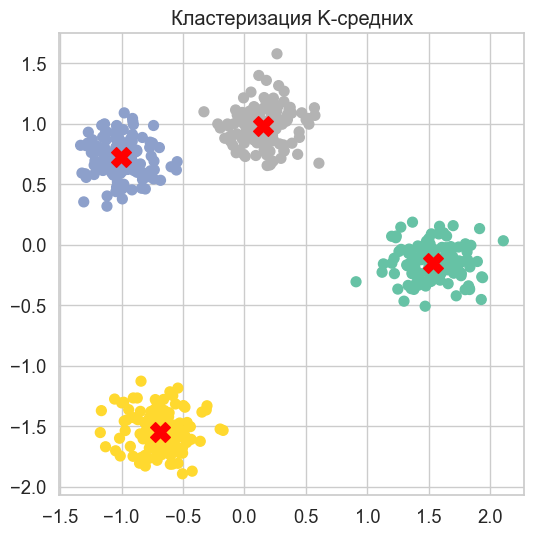

In [72]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='Set2', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("Кластеризация K-средних")
plt.show()


Агломеративная кластеризация

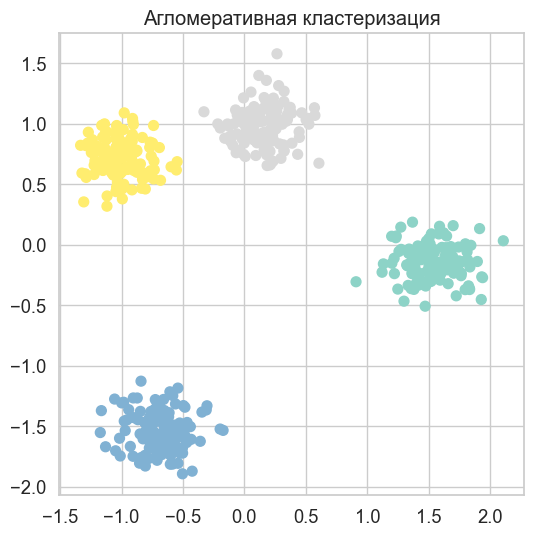

In [73]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='Set3', s=50)
plt.title("Агломеративная кластеризация")
plt.show()


DBSCAN

Оптимальный eps: 0.12379819253667311


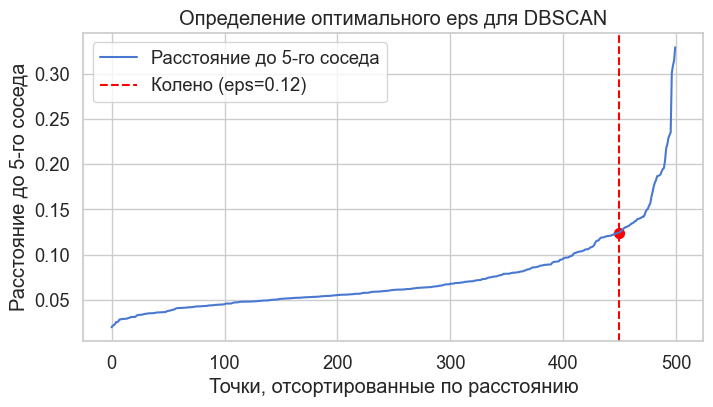

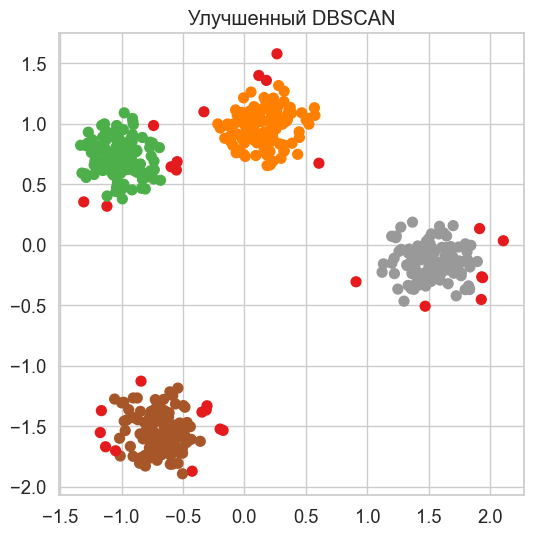

In [74]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])

knee = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
optimal_eps = distances[knee.knee]
print("Оптимальный eps:", optimal_eps)
plt.figure(figsize=(8, 4))
plt.plot(distances, label='Расстояние до 5-го соседа')
plt.axvline(knee.knee, color='red', linestyle='--', label=f'Колено (eps={optimal_eps:.2f})')
plt.scatter(knee.knee, optimal_eps, color='red', s=50)
plt.title("Определение оптимального eps для DBSCAN")
plt.xlabel("Точки, отсортированные по расстоянию")
plt.ylabel("Расстояние до 5-го соседа")
plt.legend()
plt.show()

dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='Set1', s=50)
plt.title("Улучшенный DBSCAN")
plt.show()


In [75]:
print("KMeans:")
print("Silhouette Score:", f"{silhouette_score(X_scaled, kmeans_labels):.2f}")
print("Calinski-Harabasz Score:", f"{calinski_harabasz_score(X_scaled, kmeans_labels):.2f}")
print("Davies-Bouldin Score:", f"{davies_bouldin_score(X_scaled, kmeans_labels):.2f}")

print("\nAgglomerative Clustering:")
print("Silhouette Score:", f"{silhouette_score(X_scaled, agglo_labels):.2f}")
print("Calinski-Harabasz Score:", f"{calinski_harabasz_score(X_scaled, agglo_labels):.2f}")
print("Davies-Bouldin Score:", f"{davies_bouldin_score(X_scaled, agglo_labels):.2f}")

if len(set(dbscan_labels)) > 1:
    print("\nDBSCAN:")
    print("Silhouette Score:", f"{silhouette_score(X_scaled, dbscan_labels):.2f}")
    print("Calinski-Harabasz Score:", f"{calinski_harabasz_score(X_scaled, dbscan_labels):.2f}")
    print("Davies-Bouldin Score:", f"{davies_bouldin_score(X_scaled, dbscan_labels):.2f}")
else:
    print("\nDBSCAN нашёл только один кластер")


KMeans:
Silhouette Score: 0.80
Calinski-Harabasz Score: 5578.01
Davies-Bouldin Score: 0.28

Agglomerative Clustering:
Silhouette Score: 0.80
Calinski-Harabasz Score: 5578.01
Davies-Bouldin Score: 0.28

DBSCAN:
Silhouette Score: 0.72
Calinski-Harabasz Score: 1254.06
Davies-Bouldin Score: 1.22


* Silhouette Score - насколько сильно каждая точка относится к своему кластеру, больше лучше
* Calinski-Harabasz Score - насколько кластеры плотные и разнесённые, больше лучше
* Davies-Bouldin Score - насколько кластеры похожи друг на друга, меньше лучше
